# Data Visualization

In [68]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# load data
path = 'all_grades_data_cleaned.csv'
df = pd.read_csv(path, index_col = 0)

In [70]:
# inspect
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49012 entries, 12 to 64185
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   section_type       49012 non-null  object 
 1   instructor_id      49012 non-null  object 
 2   facility_code      45521 non-null  object 
 3   start_time         49012 non-null  float64
 4   mon                49012 non-null  bool   
 5   tues               49012 non-null  bool   
 6   wed                49012 non-null  bool   
 7   thurs              49012 non-null  bool   
 8   fri                49012 non-null  bool   
 9   subject_name       49012 non-null  object 
 10  course_name        49012 non-null  object 
 11  a_proportion       49012 non-null  float64
 12  f_proportion       49012 non-null  float64
 13  avg_grade          49012 non-null  float64
 14  year               49012 non-null  int64  
 15  term               49012 non-null  object 
 16  class_length       49

,section_type,instructor_id,facility_code,start_time,mon,tues,wed,thurs,fri,subject_name,course_name,a_proportion,f_proportion,avg_grade,year,term,class_length,total_time,weekend,course_difficulty
5582,lab,other,NaN,-1.0,False,False,False,False,False,psychology,capstone mentored research and seminar,0.769231,0.000000,3.884615,15,fall,0.0,0,False,advanced
47980,lab,146785.0,0469,630.0,False,False,False,False,False,music,ensemble: wisconsin singers,0.967742,0.000000,3.967742,12,fall,450.0,450,True,elementary
28477,lec,other,0407,870.0,True,False,True,False,False,industrial and systems engineering,other,0.230769,0.000000,3.217949,12,fall,75.0,150,False,intermediate
16803,lec,other,0048,595.0,True,False,True,False,True,mathematics,other,0.400000,0.000000,3.350000,13,spring,50.0,150,False,advanced
29352,lec,other,0544,960.0,False,True,False,True,False,art history,other,0.600000,0.000000,3.600000,10,spring,75.0,150,False,advanced
57825,lec,other,0482,530.0,True,True,False,True,True,spanish (spanish and portuguese),third semester spanish,0.217391,0.000000,3.260870,12,fall,50.0,200,False,elementary
22582,lec,other,0076,960.0,False,True,False,True,False,life sciences communication,science and technology newswriting,0.666667,0.055556,3.333333,13,spring,75.0,150,False,elementary
47385,lec,other,0031,530.0,False,True,False,True,False,kinesiology,other,0.437500,0.000000,3.562500,11,spring,50.0,100,False,intermediate
4646,lec,other,0082,1140.0,False,True,False,False,False,sociology,topics in sociology,0.555556,0.000000,3.777778,18,fall,75.0,75,False,intermediate
3605,lec,other,0046,870.0,False,True,False,True,False,religious studies,topics in religious studies - humanities,0.451613,0.000000,3.645161,17,fall,75.0,150,False,intermediate


# Univariate Visualizations

## Target

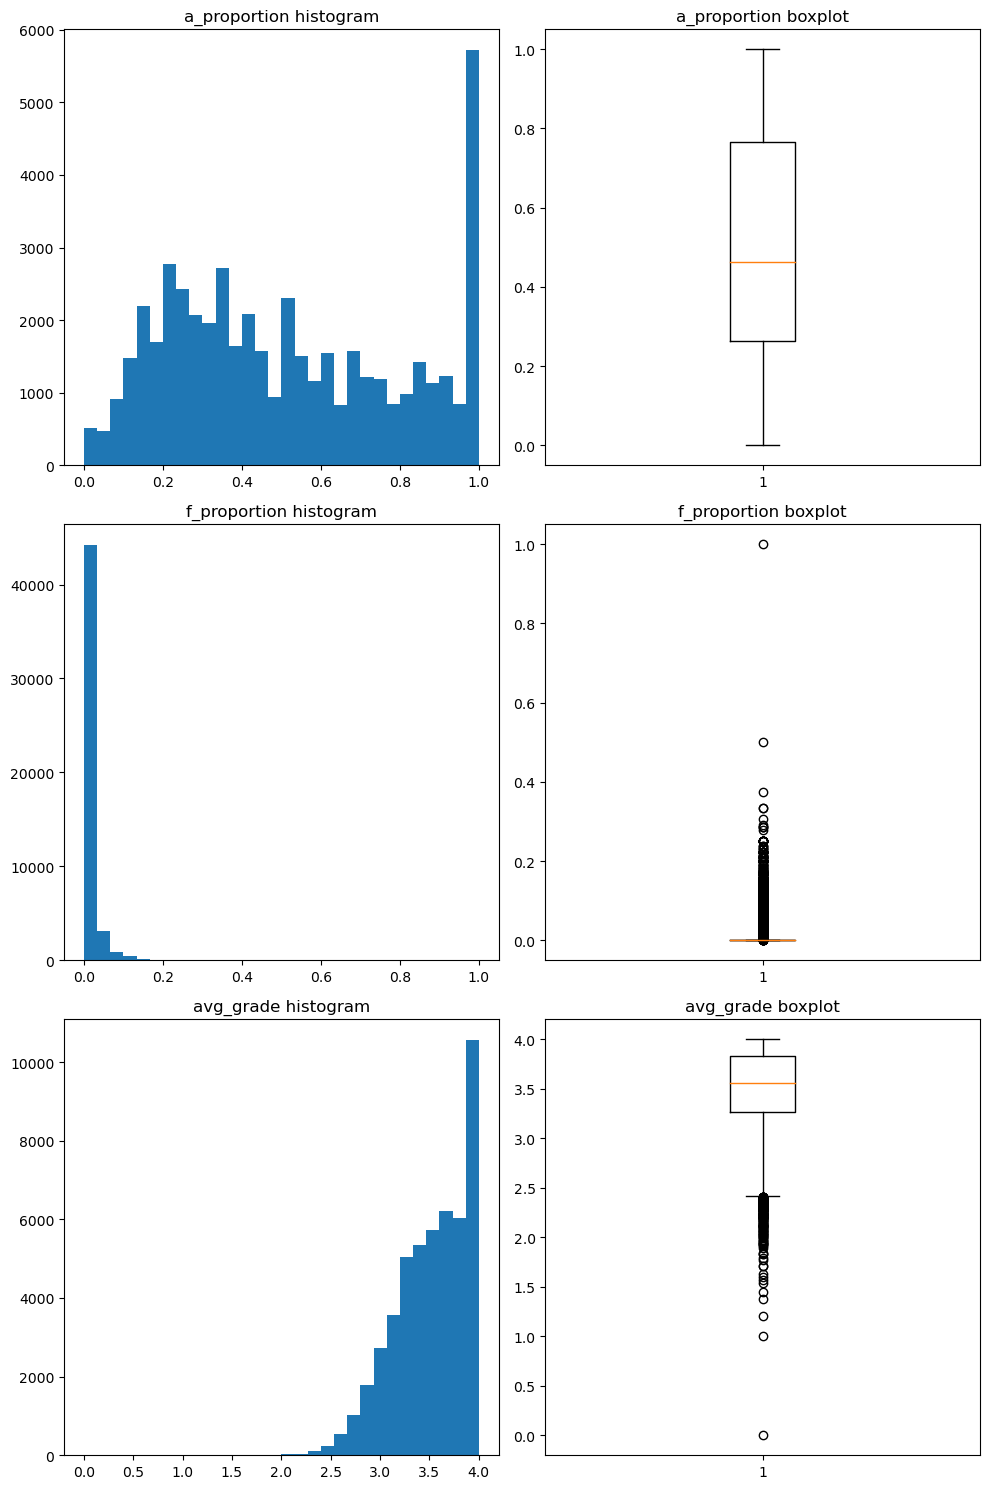

In [71]:
# three target variables: 'a_proportion', 'f_proportion', 'avg_grade'
# histograms and boxplots

targets = ['a_proportion', 'f_proportion', 'avg_grade']
targets_df = df[['a_proportion', 'f_proportion', 'avg_grade']]

fig, axes = plt.subplots(nrows = len(targets), ncols = 2, figsize = (10, 15))

for i, col in enumerate(targets_df):

    axes[i][0].hist(df[col], bins = 30)
    axes[i][0].set_title(f"{col} histogram")
    
    axes[i][1].boxplot(df[col])
    axes[i][1].set_title(f"{col} boxplot")

plt.tight_layout()

There is a very interesting distribution of As and Fs. The number of courses that have an a_proportion of 1, meaning that all students who received a letter grade in that section received an A, is extremely high. This tells me that it may be difficult to predict it, since there may not be enough variation in the distribution to predict. It would be interesting to see if taking out the As would result in predicting more of the grade variation between B and F.

The a_proportion boxplot shows us that most of the sections are centered around a median close to 0.5, meaning that out of all letter grades awarded, about have were As.

The f_distribution shows what we would expect with the a_proportion, that since there are a lot of sections with an a_proportion of 1, there are equally as many sections with an f_proportion of 0. Again, taking Fs out to see if we can predict the remaining grade variation better would be interesting.

The f_proportion boxplot shows us that by far most courses did not have any meaningful percentage of Fs, and the outlier course with the highest proportion of Fs had about 10% of the section awarded an F grade.

The avg_grade, which is on a 4.0 grade-point scale, is skewed toward 4.0 with the number of sections with all As. It tapers down more or less until about a 2.25, after which there are not enough courses in those bins to see on the plot. A 2.0 is a C, which in my experience is the grade requirement to receive credit for a course (for a variety of reasons, such as it being a course in a major/minor). Although a D grade usually gives credit, there are many grade requirements that require a C. Given this information, it is interesting to see that a vast majority of courses have an average grade of above a 2.0, and definitely above a 1.0, meaning that the majority of students usually pass a course.

The average grade boxplot shows us that most sections had a very high average grade, and only 20% of courses had an average grade of below about 2.5. There are several outlier sections with lower average grades, and one outlier section with an average grade of 0.0, which is an F.

## Outliers in Target

In [72]:
df[df['avg_grade'] == 0]

,section_type,instructor_id,facility_code,start_time,mon,tues,wed,thurs,fri,subject_name,course_name,a_proportion,f_proportion,avg_grade,year,term,class_length,total_time,weekend,course_difficulty
39484,lab,2601912.0,0028,560.0,False,False,False,False,True,physical educ activity progm,adapted fitness&pers traing,0.0,1.0,0.0,8,fall,100.0,100,False,elementary


This is a very interesting case, but without more information suggesting it is not valid, I will keep it in the dataset for now.

## Features

### Categorical

In [73]:
# look at all the features' dtypes
df.dtypes

section_type          object
instructor_id         object
facility_code         object
start_time           float64
mon                     bool
tues                    bool
wed                     bool
thurs                   bool
fri                     bool
subject_name          object
course_name           object
a_proportion         float64
f_proportion         float64
avg_grade            float64
year                   int64
term                  object
class_length         float64
total_time             int64
weekend                 bool
course_difficulty     object
dtype: object

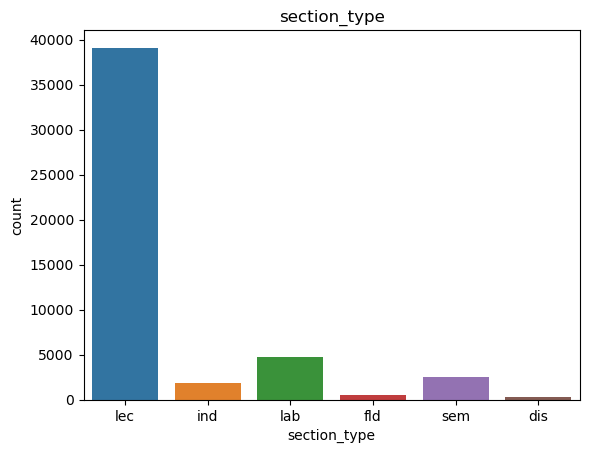

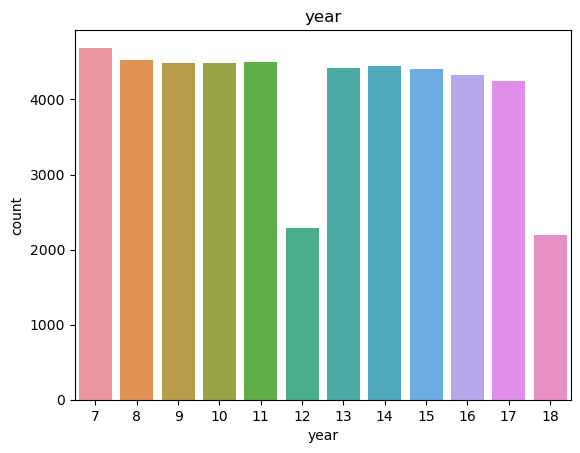

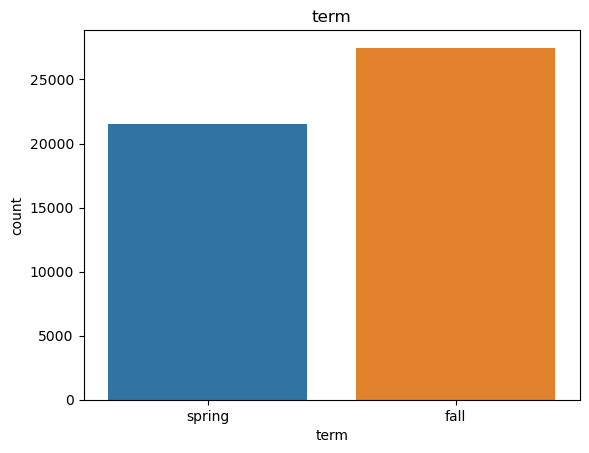

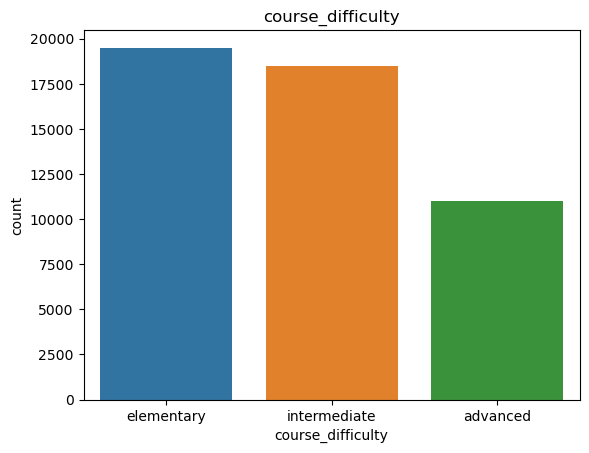

In [74]:
# barplots to explore categorical features except 'instructor_id', 'subject_
# name', 'course_name', and 'facility_code', which have too many distinct
# values to visualize cleanly in a barplot

for col in ['section_type', 'year', 'term', 'course_difficulty']:
  col_name = col
  plot = sns.countplot(data = df, x = col)
  plot.set_title(col_name)
  plt.show()
  print('\n\n')

By far the most common section type is lecture. This is plausible; other section types are more specific and are reserved for non-typical classes. 

I'm not sure why the years 2012 and 2018 seem to have significantly fewer (almost by half) courses in the dataset compared to other years. This would be something to further investigate with the data originator. 

More courses are offered in Fall than in Spring terms in general, so the breakdown by term looks normal. It looks like no Summer term courses are included in the dataset; they would be a very interesting addition. Students often wonder if they should take Summer courses, which are usually shorter in absolute duration, than semester-long classes. 

The distribution of course difficulty looks normal as well. Most courses are at the elementary/introductory level, then fewer students continue on to the intermediate then advanced courses, so there are fewer of those offered. 

In [75]:
# select all days of the week columns
days_cols = ['mon', 'tues', 'wed', 'thurs', 'fri', 'weekend']

# replace values with 1s and 0s
df[days_cols] = df[days_cols].replace({True: 1, False: 0})

# check
df[days_cols].sample(10)

,mon,tues,wed,thurs,fri,weekend
21250,1,0,1,0,0,0
2661,0,0,0,1,0,0
50228,1,1,1,1,0,0
55671,1,0,1,0,0,0
32043,1,0,1,0,1,0
19184,1,0,1,0,1,0
40465,0,0,1,0,0,0
26158,0,1,0,1,0,0
52633,1,0,1,0,0,0
21957,0,1,0,1,0,0


In [76]:
# check
df.dtypes

section_type          object
instructor_id         object
facility_code         object
start_time           float64
mon                    int64
tues                   int64
wed                    int64
thurs                  int64
fri                    int64
subject_name          object
course_name           object
a_proportion         float64
f_proportion         float64
avg_grade            float64
year                   int64
term                  object
class_length         float64
total_time             int64
weekend                int64
course_difficulty     object
dtype: object

In [77]:
# create empty dictionary to track how many courses on which days of week
days_dict = {}

# loop through days list
for col in days_cols:

    # populate days_dict
    days_dict[col] = df[col].sum()

# check
print(days_dict)

{'mon': 22453, 'tues': 21864, 'wed': 21832, 'thurs': 20990, 'fri': 12521, 'weekend': 265}


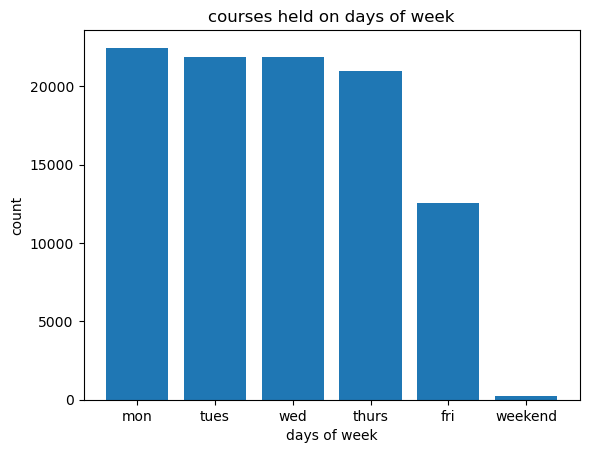

In [78]:
names = list(days_dict.keys())
values = list(days_dict.values())

plt.bar(range(len(days_dict)), values, tick_label=names)
plt.title('courses held on days of week')
plt.ylabel('count')
plt.xlabel('days of week')
plt.show()

Most courses are held from Monday to Thursday. A little more than half of courses held on those days are held on Fridays. Predictably, only a very few number of courses are held on the weekend. 

This plot shows the number of classes held on each day. Many of the classes are held twice or three times per week, so many of the classes held on Mondays are also held on Wednesdays, for example.

### Numeric Features

In [79]:
df.describe(include = 'number')

,start_time,mon,tues,wed,thurs,fri,a_proportion,f_proportion,avg_grade,year,class_length,total_time,weekend
count,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000,49012.000000
mean,676.647494,0.458112,0.446095,0.445442,0.428262,0.255468,0.514208,0.008356,3.514628,12.199502,74.034012,147.119073,0.005407
std,241.312605,0.498247,0.497091,0.497020,0.494832,0.436128,0.293018,0.023905,0.374382,3.400702,48.227477,124.701743,0.073333
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000
25%,570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264706,0.000000,3.264706,9.000000,50.000000,115.000000,0.000000
50%,660.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.461804,0.000000,3.559322,12.000000,75.000000,150.000000,0.000000
75%,865.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.764706,0.000000,3.833333,15.000000,75.000000,150.000000,0.000000
max,1260.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,18.000000,600.000000,3000.000000,1.000000


In [80]:
# make list of numeric features
numeric_features = ['start_time', 'class_length', 'total_time']

numeric_features_df = df[['start_time', 'class_length', 'total_time']]

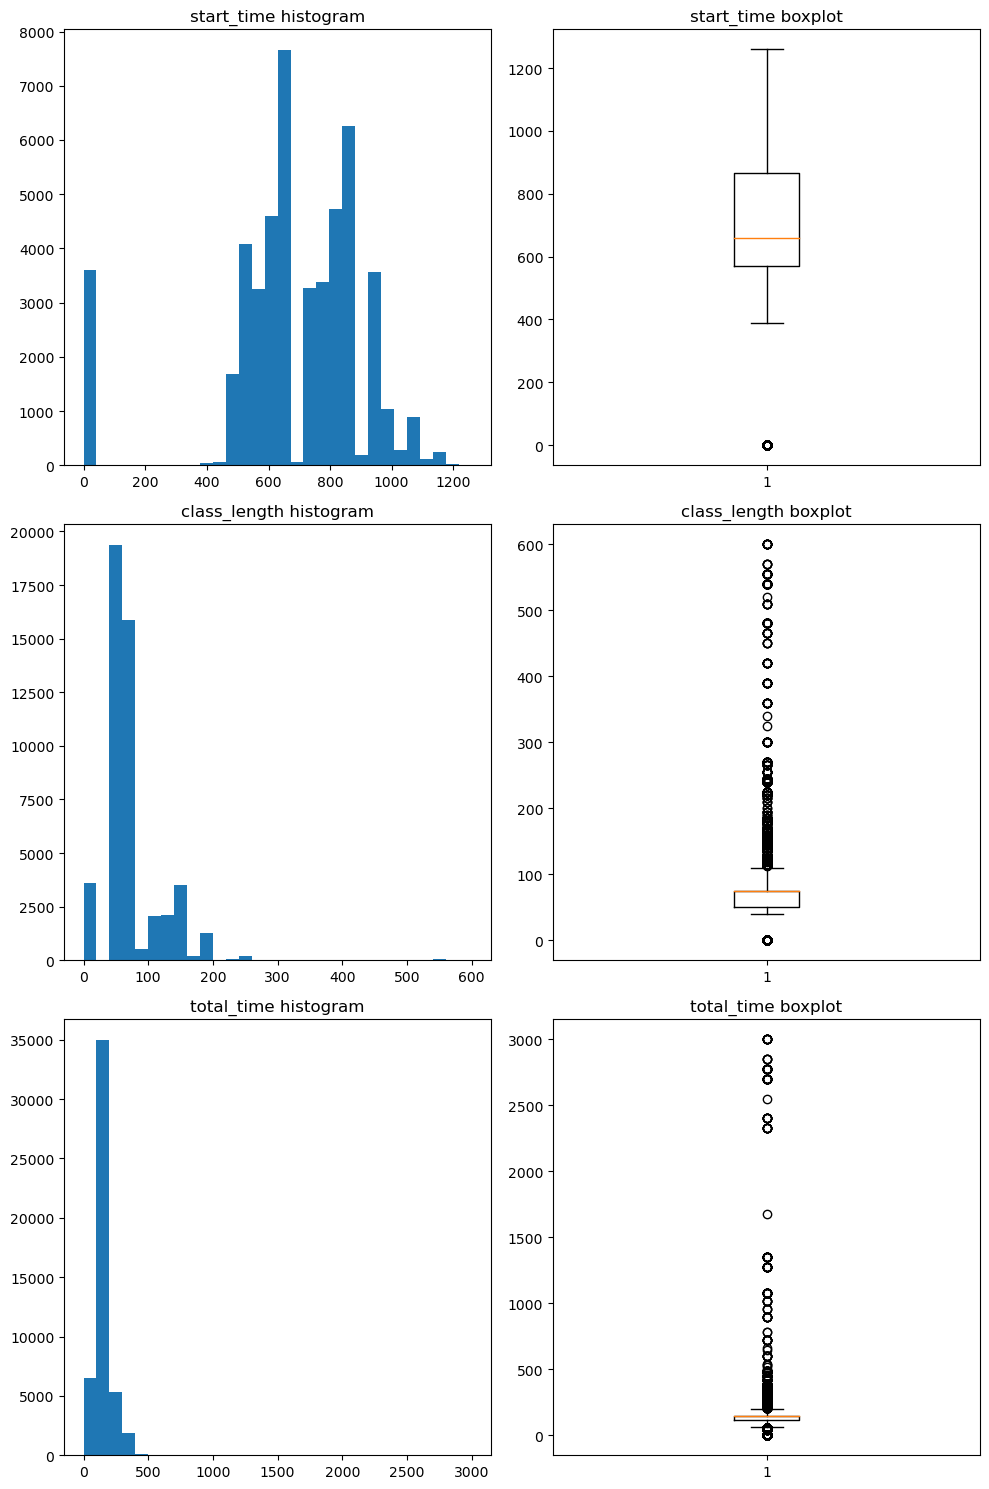

In [81]:
# boxplots and histograms for numeric variables

fig, axes = plt.subplots(nrows = len(targets), ncols = 2, figsize = (10, 15))

for i, col in enumerate(numeric_features_df):

    axes[i][0].hist(df[col], bins = 30)
    axes[i][0].set_title(f"{col} histogram")
    
    axes[i][1].boxplot(df[col])
    axes[i][1].set_title(f"{col} boxplot")

plt.tight_layout()

#### Start Time

The outliers for 'start_time' that seem to be around 0 are the ones that don't have a start time assigned; they are coded in the original .csv files on Kaggle with the value -1.

Leaving out outliers for 'class_length' and 'total_time', the middle 50% of sections are between 50-75 minutes long and meet for a total of between 115-150 minutes per week. 

The histogram below without outliers for start_time shows a relatively normal distribution centered around around 700 minutes (11 2/3 hours, so around noon). It makes sense that about half of classes start before noon and about half after. 



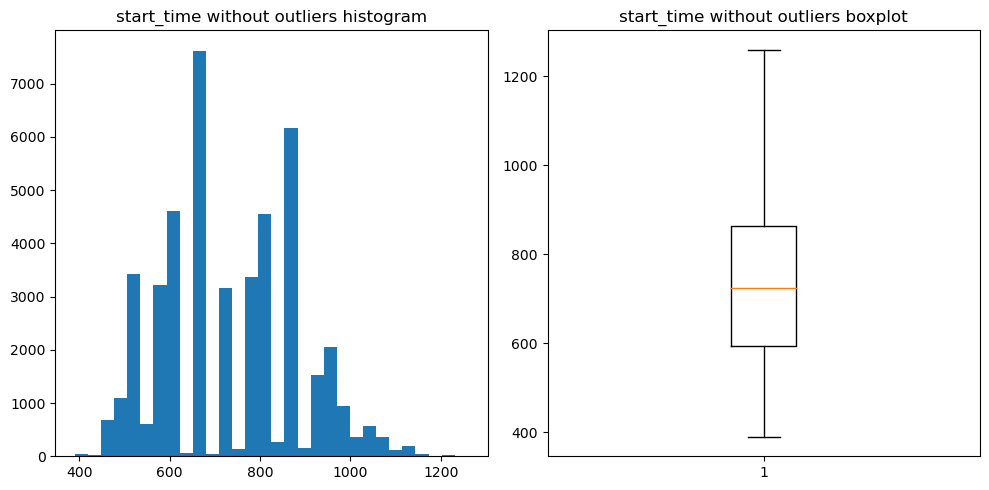

In [82]:
# fixed histogram for start_time

start_time_no_outliers = df[df['start_time'] != -1]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(start_time_no_outliers['start_time'], bins = 30)
axes[0].set_title("start_time without outliers histogram")
    
axes[1].boxplot(start_time_no_outliers['start_time'])
axes[1].set_title("start_time without outliers boxplot")

plt.tight_layout()

#### Class Length

The histogram, boxplot, and .value_counts() function call below show that by far, the majority of classes go for 50 or 75 minutes. As seen in the boxplot above, the boxplot shows that even the third-most frequent class length value, 150 minutes, is classified as an outlier, and there are many outliers in general since the 50-minute and 75-minute classes have so many instances. 

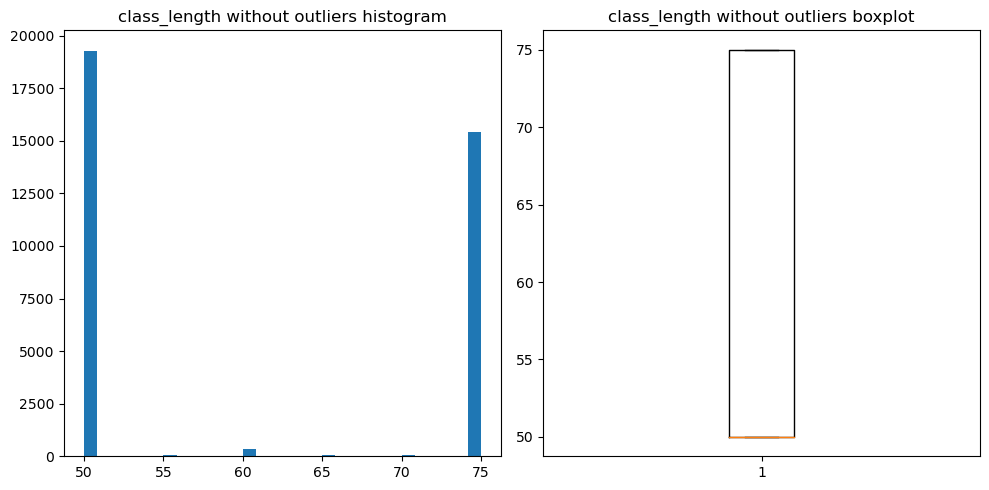

In [83]:
# fixed histogram for class_length

# the .describe() function indicates that the median 50% of class_length
# times fall between 50 and 75, so we will make a histogram showing the
# distribution in that range

class_length_no_outliers = df[(df['class_length'] >= 50) & 
                              (df['class_length'] <= 75)]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(class_length_no_outliers['class_length'], bins = 30)
axes[0].set_title("class_length without outliers histogram")
    
axes[1].boxplot(class_length_no_outliers['class_length'])
axes[1].set_title("class_length without outliers boxplot")

plt.tight_layout()

In [84]:
df['class_length'].value_counts()

50.0     19284
75.0     15419
0.0       3598
150.0     3371
120.0     1991
         ...  
340.0        1
325.0        1
113.0        1
40.0         1
520.0        1
Name: class_length, Length: 61, dtype: int64

#### Total Time

The total_time values are similarly distributed, compared to class_length, which makes sense since class_length indicates the amount of time on any day the class meets, and total_time multiplies that number by how many days per week the class meets (most of the time 2 or 3). So, the two most frequent total_time values are 150, which is 75 minutes 2 days a week, and 100, which is 50 minutes 2 days a week. 

Since these feature variables are highly correlated, one of these may be a candidate for dropping for the machine learning model. 

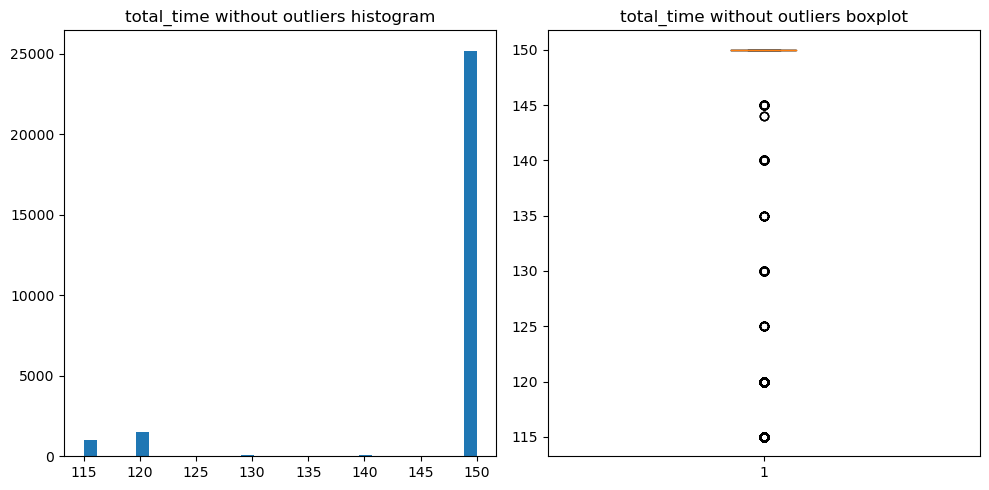

In [85]:
# fixed histogram for total_time

# the .describe() function indicates that the median 50% of total_time
# times fall between 115 and 150, so we will make a histogram showing the
# distribution in that range

total_time_no_outliers = df[(df['total_time'] >= 115) & 
                              (df['total_time'] <= 150)]

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

axes[0].hist(total_time_no_outliers['total_time'], bins = 30)
axes[0].set_title("total_time without outliers histogram")
    
axes[1].boxplot(total_time_no_outliers['total_time'])
axes[1].set_title("total_time without outliers boxplot")

plt.tight_layout()

In [86]:
df['total_time'].value_counts()

150    25201
100     5313
0       3604
200     3130
300     1758
       ...  
113        1
380        1
650        1
340        1
290        1
Name: total_time, Length: 90, dtype: int64

# Multivariate Visualizations

## Subjects and Grades

Do students earn higher grades in certain subjects? There is the conception in higher ed that some subjects, say Communications, are easier than others, say Chemistry. Let's see if this dataset can shed any light on this notion.

In [87]:
# since not all subjects have their own majors or vice versa; this 
# list of subjects is not a guide to available majors and may be confusing

# to fix this a bit, i can go through each course's course_difficulty and make
# sure that if the subject doesn't have courses at all difficulty levels,
# they do not get included in this plot; this would act as a proxy for 
# actual majors (because actual majors must have courses at all levels,
# whereas some subjects only have, say, upper-level courses, and therefore
# are not in themselves majors)

# only going to include subjects with courses at all difficulty levels
# (assuming that a major has courses at all levels)

# get list of subject names
subj_list = df['subject_name'].unique()

# initiate empty list to save subjects with courses in all difficulty levels
all_diff_subj_list = []

# for each subject
for subj in subj_list:
    
    # create filtered df for every subject
    filtered_df = df[df['subject_name'] == subj]
    
    # get list of all course difficulties
    difficulties_list = filtered_df['course_difficulty'].unique()
    
    # if each course difficulty is in the list, pass subject to new list
    if all(x in difficulties_list for x in ['elementary', 
                                            'intermediate', 
                                            'advanced']):
        
        # append to new list
        all_diff_subj_list.append(subj)

# check
print(len(all_diff_subj_list))

102


In [88]:
# make filtered df with only subjects on all_diff_subj_list
all_diff_subj_df = df[df['subject_name'].isin(all_diff_subj_list)]

# check
all_diff_subj_df['subject_name'].nunique()

102

In [89]:
# subject groups by averages
# only subjects with courses in all difficulty levels
subject_groups_avg = all_diff_subj_df.groupby('subject_name', 
                                              as_index = False
                                              ).mean(numeric_only = True)[[
                                                             'subject_name',
                                                             'a_proportion', 
                                                             'f_proportion', 
                                                             'avg_grade']]
# check
len(subject_groups_avg)

102

In [90]:
# to include the proportion of As and Fs, AND the average grade on a 4.0
# scale in the same plot, scale avg_grade column to between 0-1

# see max avg_grade
subject_groups_avg['avg_grade'].max()

# scale down
subject_groups_avg['avg_grade'] = subject_groups_avg['avg_grade'] / 4

In [91]:
# check
subject_groups_avg['avg_grade'].max()

0.9782730801728297

In [92]:
# sort by avg_grade
subject_groups_avg = subject_groups_avg.sort_values(by = 'avg_grade').reset_index(drop = True)

# check
display(subject_groups_avg.head())
display(subject_groups_avg.tail())

,subject_name,a_proportion,f_proportion,avg_grade
0,mathematics,0.278802,0.036766,0.728008
1,engineering mechanics and astronautics,0.270821,0.022744,0.756272
2,biological systems engineering,0.238534,0.009269,0.777371
3,economics,0.264926,0.012641,0.777864
4,wildlife ecology,0.335212,0.007146,0.786210


,subject_name,a_proportion,f_proportion,avg_grade
97,nursing,0.779447,0.000273,0.962752
98,biology,0.843158,0.003533,0.964449
99,population health sciences,0.824989,0.001192,0.965625
100,rehabilitation psychology and special education,0.856333,0.001672,0.973405
101,curriculum and instruction,0.884312,0.001282,0.978273


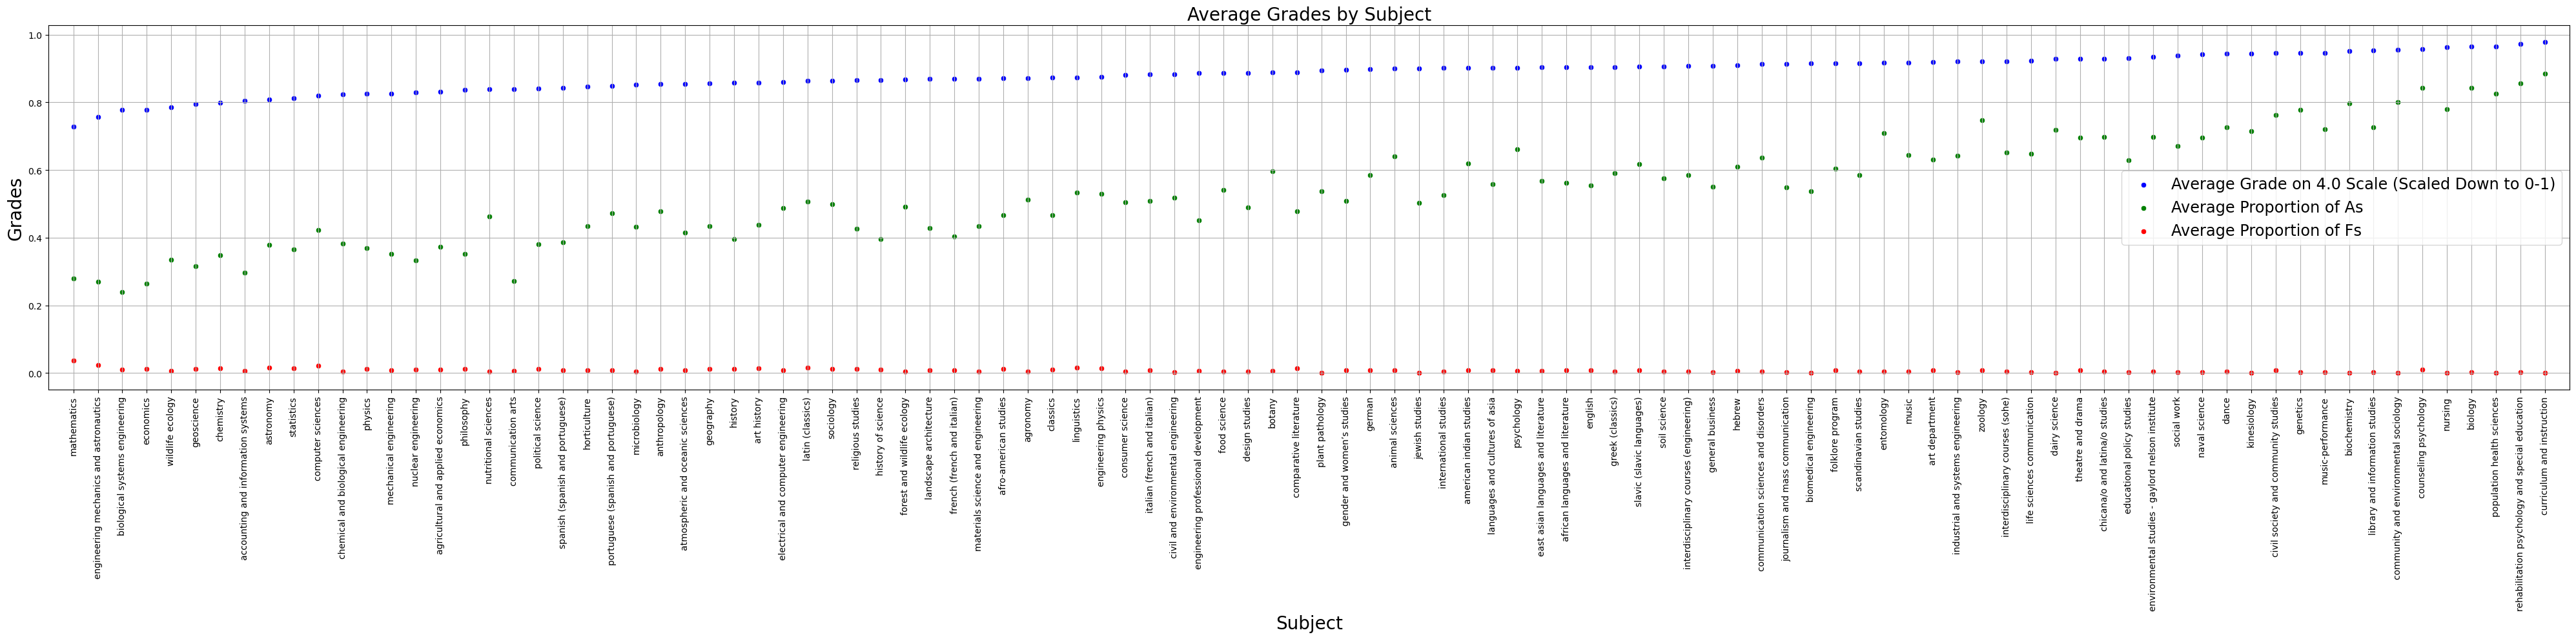

In [93]:
# make plot
fig, ax = plt.subplots(figsize = (40, 10))

# labels
ax.set_title('Average Grades by Subject', fontsize = 20) 
ax.set_ylabel('Grades', fontsize = 20) 
ax.set_xlabel('Subject', fontsize = 20)

# avg_grade
sns.scatterplot(data = subject_groups_avg, 
               x = 'subject_name', 
               y = 'avg_grade',
               ax = ax,
               c = 'blue',
               label = 'Average Grade on 4.0 Scale (Scaled Down to 0-1)')

# a_proportion
sns.scatterplot(data = subject_groups_avg,
               x = 'subject_name',
               y = 'a_proportion',
               ax = ax,
               c = 'green',
               label = 'Average Proportion of As')

# f_proportion
sns.scatterplot(data = subject_groups_avg,
               x = 'subject_name',
               y = 'f_proportion',
               ax = ax,
               c = 'red',
               label = 'Average Proportion of Fs')

# sprucing up
plt.xticks(rotation = 'vertical')
ax.yaxis.grid()
ax.xaxis.grid()
plt.margins(x=0.01, tight=True)

# legend
plt.legend(loc = 'center right', fontsize = 'xx-large')

# display
plt.tight_layout()
plt.show()

This is an interesting and very informative plot, but not easy to determine which are the "easiest" vs. "hardest" subjects at a glance. We'll make an alternate plot that just shows the top and bottom 10 subjects.

In [94]:
# make alternate plot that only plots top and bottom 10 to make simpler

# grab top and bottom ten classes
subject_groups_avg2 = subject_groups_avg[0:10]
subject_groups_avg3 = subject_groups_avg[92:102]

# make df
subject_groups_avg_alt = pd.concat([subject_groups_avg2, 
                                    subject_groups_avg3], 
                                   axis = 0)

# check
subject_groups_avg_alt

,subject_name,a_proportion,f_proportion,avg_grade
0,mathematics,0.278802,0.036766,0.728008
1,engineering mechanics and astronautics,0.270821,0.022744,0.756272
2,biological systems engineering,0.238534,0.009269,0.777371
3,economics,0.264926,0.012641,0.777864
4,wildlife ecology,0.335212,0.007146,0.786210
5,geoscience,0.316623,0.012151,0.794244
6,chemistry,0.348187,0.014224,0.798256
7,accounting and information systems,0.296860,0.006653,0.804443
8,astronomy,0.378953,0.016876,0.808508
9,statistics,0.365139,0.014754,0.812905


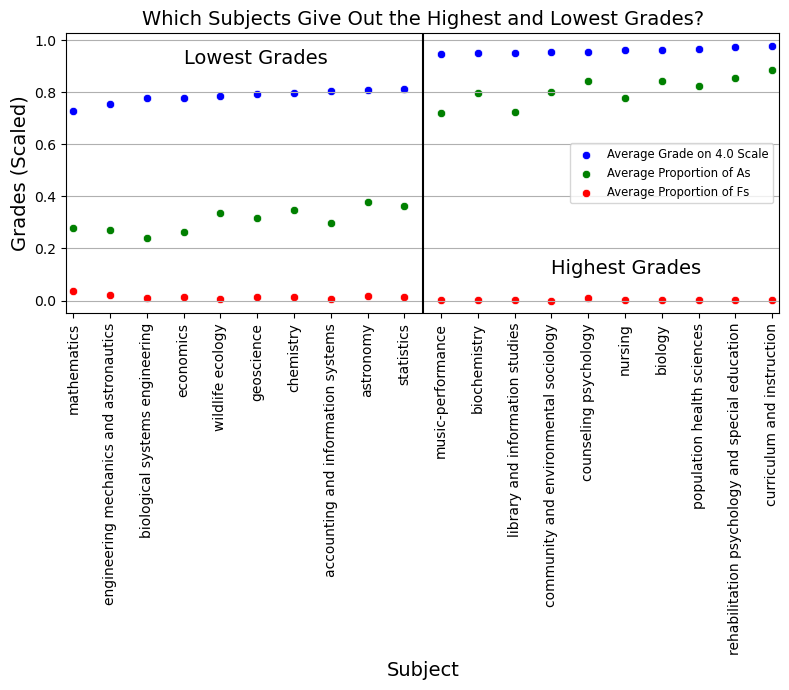

In [95]:
# make plot
fig, ax = plt.subplots(figsize = (8, 7))

# labels
ax.set_title('Which Subjects Give Out the Highest and Lowest Grades?', 
             fontsize = 14) 
ax.set_ylabel('Grades (Scaled)', fontsize = 14) 
ax.set_xlabel('Subject', fontsize = 14)

# avg_grade
sns.scatterplot(data = subject_groups_avg_alt, 
               x = 'subject_name', 
               y = 'avg_grade',
               ax = ax,
               c = 'blue',
               label = 'Average Grade on 4.0 Scale')

# a_proportion
sns.scatterplot(data = subject_groups_avg_alt,
               x = 'subject_name',
               y = 'a_proportion',
               ax = ax,
               c = 'green',
               label = 'Average Proportion of As')

# f_proportion
sns.scatterplot(data = subject_groups_avg_alt,
               x = 'subject_name',
               y = 'f_proportion',
               ax = ax,
               c = 'red',
               label = 'Average Proportion of Fs')

# sprucing up
plt.xticks(rotation = 'vertical')
ax.yaxis.grid()
# ax.xaxis.grid()
plt.margins(x=0.01, tight=True)
plt.axvline(x = 9.5, color = 'black')
plt.text(3, .91, 'Lowest Grades', fontsize = 14)
plt.text(13, .1, 'Highest Grades', fontsize = 14)

# legend
plt.legend(loc = 'center right', fontsize = 'small')

# display
plt.tight_layout()
plt.show()

This plot shows that, indeed, students in different subjects earn varying grades on average. The plot is sorted by average grade (blue dots), so we may expect that the proportion of As (green) and Fs (red) do not follow the same pattern as the nicely-ordered blue dots, since the data is not sorted on them. However, although the pattern of the proportion of As is erratic, there is a definite visible trend of proportion of As going up as average grade also goes up. The proportion of Fs doesn't follow as well; thankfully, a very minimal proportion of Fs holds for all subjects in the plot (although it does look like math, which has the lowest average grade, also has the highest proportion of Fs, but not the lowest proportion of As; this belongs to biological systems engineering). 

On the lower end of the spectrum, subjects like math, engineering, chemistry, and other math- and science-related fields generally give the lowest average grades, give the lowest proportion of As, and the highest proportion of Fs. But on the higher end, we also see some STEM fields such as biology, biochemistry, and genetics. There are more options for non-STEM fields on the higher end however, with subjects such as curriculum and instruction, dance, music, sociology, and psychology. 

Note: This plot only includes subjects that have at least one course at each difficulty level (elementary, intermediate, and advanced) in the dataset. 

## Instructors and Grades

Do certain instructors give higher grades? Many students ask friends or the internet about the instructor before enrolling in a class, especially if it is an elective or used to fill a general education requirement (of which there are many options for the student to choose from). 

Do instructors who teach more often give out higher grades? Is the burden of grading a lot of students in a lot of classes such that instructors are more lenient?

We can start to see what the data has to say about these questions by plotting the instructors with the number of classes they taught and their average grades. For simplicity, I will reduce the number of instructors plotted to those who taught more classes than the median of all instructors.

We will look at only instructors who taught more than 30 classes in the dataset. Remember that the dataset spans the academic years from Fall 2006 to Spring 2018, so on average an instructor who taught 30 classes in that time taught one class every Fall and one class every Spring semester in that period. 

In [96]:
# get list of instructor with more than 50 classes
instructor_list = list(df['instructor_id'].unique())
print(len(instructor_list))

522


In [97]:
# add column with value as the number of classes taught

# for each instructor
for instructor in instructor_list:
    
    # create filtered df for every subject
    filtered_df = df[df['instructor_id'] == instructor]
    
    # save length of filtered_df to new column in df to use for plotting
    df.loc[df['instructor_id'] == instructor, 
           'instructor_number_of_classes'] = len(filtered_df)


In [98]:
# make a df with each instructor's id, number of classes, and avg grade
inst_df = df.groupby(['instructor_id', 'instructor_number_of_classes'])['avg_grade'].mean()
inst_df = pd.DataFrame(inst_df)
inst_df.reset_index(inplace = True)
inst_df

,instructor_id,instructor_number_of_classes,avg_grade
0,1005245.0,66.0,3.850140
1,1005574.0,51.0,3.915018
2,1017545.0,22.0,2.866712
3,103165.0,24.0,3.938626
4,1040405.0,34.0,3.261943
...,...,...,...
517,980056.0,64.0,3.504679
518,984470.0,55.0,3.867336
519,998511.0,27.0,3.930979
520,999979.0,30.0,3.895090


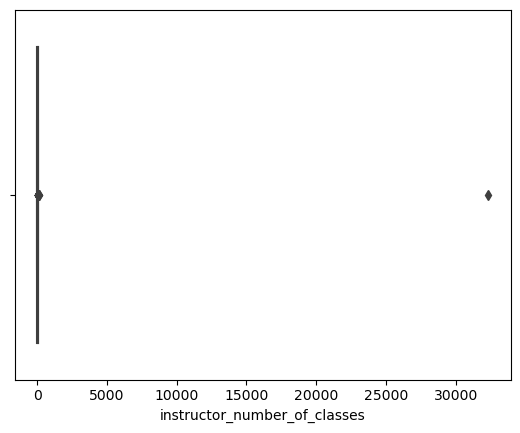

In [99]:
# check out distribution of number of classes taught to optimize plot
boxplot = sns.boxplot(data = inst_df,
                      x = 'instructor_number_of_classes')

In [100]:
# take out outlier and check again
inst_df = inst_df[inst_df['instructor_number_of_classes'] < 5000]

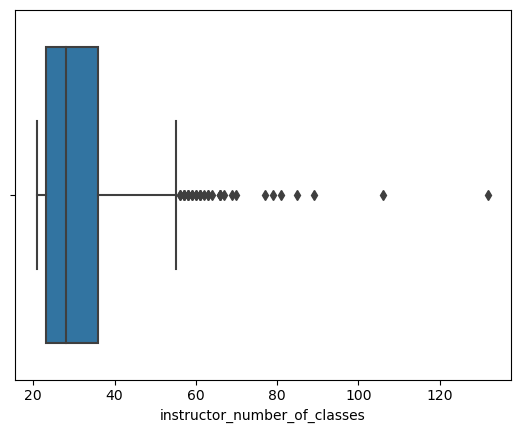

In [101]:
# check out distribution of number of classes taught to optimize plot
boxplot = sns.boxplot(data = inst_df,
                      x = 'instructor_number_of_classes')

In [102]:
# make the cutoff 55 classes taught, to leave out outliers
inst_df = inst_df[inst_df['instructor_number_of_classes'] < 55]

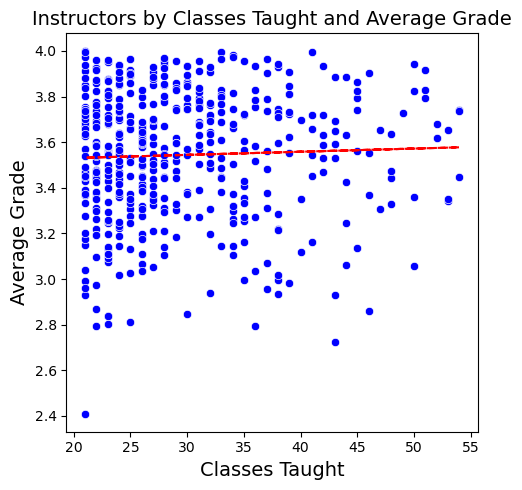

In [103]:
# make plot
fig, ax = plt.subplots(figsize = (5, 5))

# labels
ax.set_title('Instructors by Classes Taught and Average Grade', fontsize = 14) 
ax.set_ylabel('Average Grade', fontsize = 14) 
ax.set_xlabel('Classes Taught', fontsize = 14)

# scatterplot
sns.scatterplot(data = inst_df, 
               x = 'instructor_number_of_classes', 
               y = 'avg_grade',
               ax = ax,
               c = 'blue')

# trend line
x = inst_df['instructor_number_of_classes']
y = inst_df['avg_grade']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")

# display
plt.tight_layout()
plt.show()

In this plot, each dot represents a different instructor. The dot is plotted at the number of classes the instructor taught on the x-axis and the average grade given by the instructor over all classes they taught on the y-axis. 

The number of classes taught seems to start at 20, but that is an artificial boundary. When cleaning the data, in order to reduce the number of unique instructor_ids in the dataset for machine learning, all instructor_ids with fewer than a certain number of classes taught were binned into an "other" category. 

This plot shows that there is no relationship between the number of classes an instructor teaches and the average grade they give. The trend line is very flat. If anything, it may be trending upwards the slightest bit, but it is certainly not a robust trend.

## Course Difficulty and Grades

Do students earn worse grades as the courses get more difficult? 

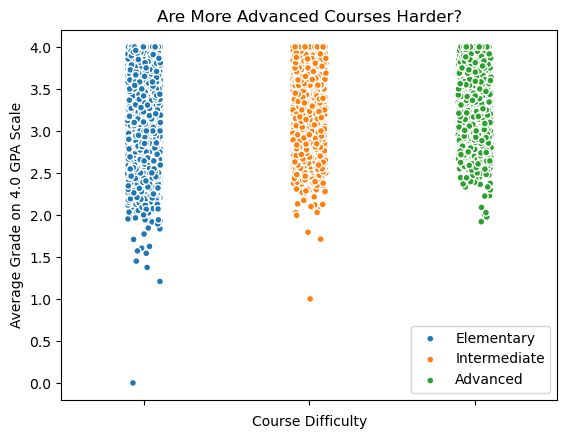

In [104]:
# stripplot
ax = sns.stripplot(data=df, x='course_difficulty', 
                   y='avg_grade',
                   hue='course_difficulty',
                   edgecolor='white', 
                   linewidth=1,
                   legend = False)

ax.set_title('Are More Advanced Courses Harder?')
ax.set_xlabel('Course Difficulty')
ax.set_ylabel('Average Grade on 4.0 GPA Scale')
ax.set_xticklabels([])
ax.legend(labels = ['Elementary', 'Intermediate', 'Advanced']);

The answer is no! From the strip plot above, we can see that most of the average grades for all levels of difficulty cluster around the maximum 4.0. We can also see that there are fewer classes offered at the intermediate level, and even fewer at the advanced level. 

The grades for the elementary level classes do dip down a bit further into the lower values, and the advanced classes have higher grades. This is the opposite of what we thought! It looks like students are earning higher grades in more advanced classes. 

Why might this be? All students take elementary-level classes when they get into college; that's where everyone starts. Students also take elementary-level classes from subjects that they will eventually not major in, so they may not be as interested in those classes. But, as students find out what they are interested in or good at, they start taking intermediate- and advanced-level classes in those subjects. So, we are seeing the effect of better students in certain subjects doing well in their chosen fields. Students who won't do well in advanced classes in a subject don't take them.

## Start Times and Grades

Do students earn higher grades in classes that  start later?

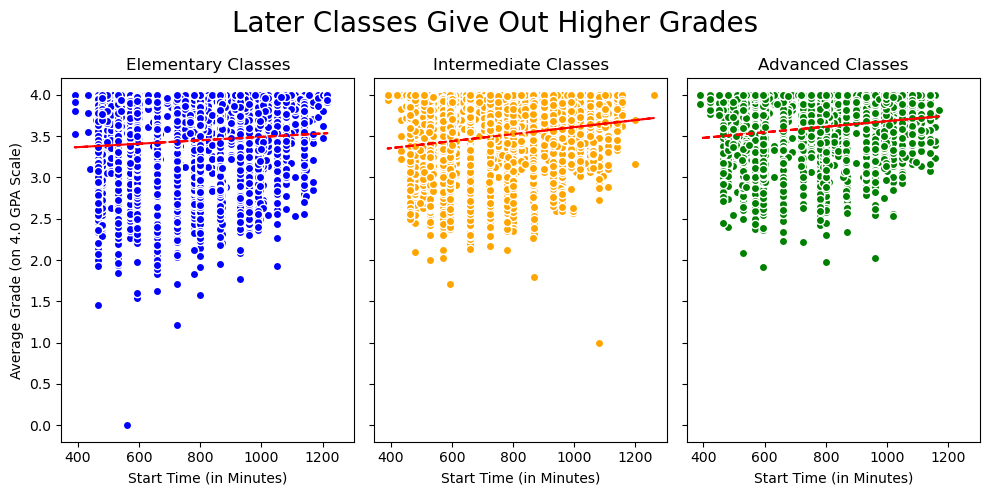

In [134]:
# scatterplots with start time on x, grade on y, and hue is difficulty
# take out the outlier classes that have no assigned start time

# create new dfs
elementary = start_time_no_outliers[start_time_no_outliers['course_difficulty'] == 'elementary']
intermediate = start_time_no_outliers[start_time_no_outliers['course_difficulty'] == 'intermediate']
advanced = start_time_no_outliers[start_time_no_outliers['course_difficulty'] == 'advanced']

# plot figure and axes
fig, axes = plt.subplots(nrows = 1, 
                        ncols = 3, 
                        figsize = (10, 5),
                        sharex = True,
                        sharey = True)
fig.suptitle('Later Classes Give Out Higher Grades', fontsize = 20)
axes[0].set_ylabel('Average Grade (on 4.0 GPA Scale)')

# elementary
axes[0].set_title('Elementary Classes')
axes[0].set_xlabel('Start Time (in Minutes)')
sns.scatterplot(data = elementary, 
               x = 'start_time', 
               y = 'avg_grade', 
               ax = axes[0],
               c = 'blue',
               edgecolor = 'white', 
               linewidth = 1)

# trend line
x = elementary['start_time']
y = elementary['avg_grade']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axes[0].plot(x, p(x), "r--")

# intermediate
axes[1].set_title('Intermediate Classes')
axes[1].set_xlabel('Start Time (in Minutes)')
sns.scatterplot(data = intermediate, 
               x = 'start_time', 
               y = 'avg_grade', 
               ax = axes[1],
               c = 'orange',
               edgecolor = 'white', 
               linewidth = 1)

# trend line
x = intermediate['start_time']
y = intermediate['avg_grade']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axes[1].plot(x, p(x), "r--")

# advanced
axes[2].set_title('Advanced Classes')
axes[2].set_xlabel('Start Time (in Minutes)')
sns.scatterplot(data = advanced, 
               x = 'start_time', 
               y = 'avg_grade', 
               ax = axes[2],
               c = 'green',
               edgecolor = 'white', 
               linewidth = 1)

# trend line
x = advanced['start_time']
y = advanced['avg_grade']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
axes[2].plot(x, p(x), "r--")

plt.tight_layout()

The answer is yes! The trend line plotted for each level of class difficulty shows a slightly positive slope. This means that students in classes that start later in the day, on average, earn higher grades than others. 